In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


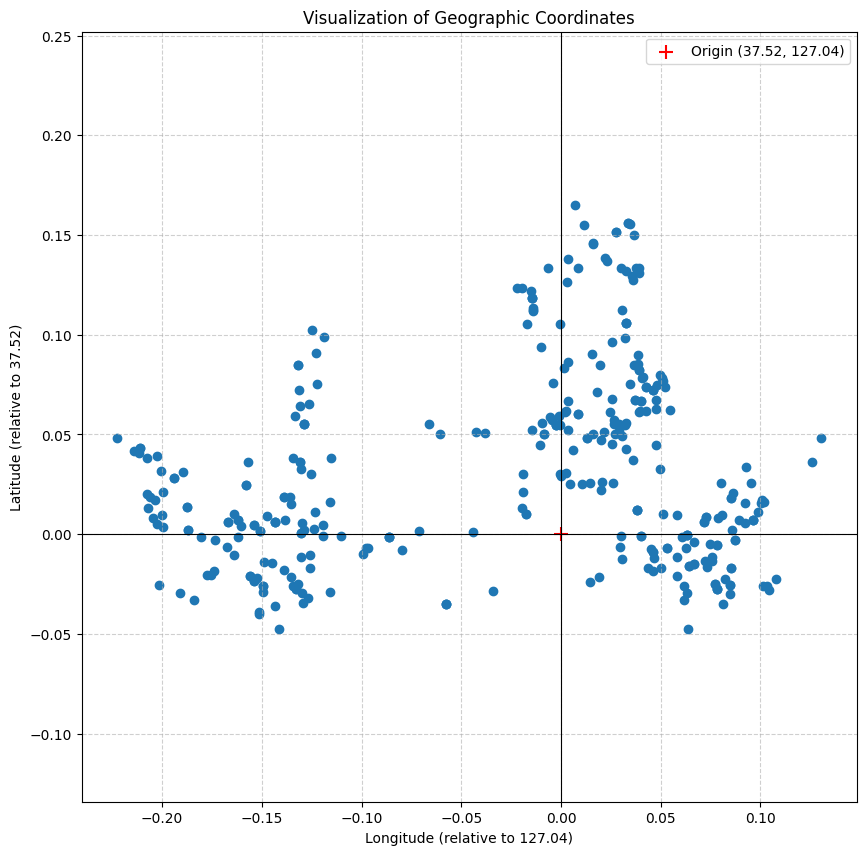

In [6]:
import matplotlib.pyplot as plt

file_path = '/content/drive/MyDrive/accident/최종_accident.csv'

# 1. CSV 파일 읽기 (기존 코드와 동일)
try:
    df = pd.read_csv(
        file_path,
        header=None,
        usecols=[1, 2],
        names=['latitude', 'longitude'],
        encoding='utf-8'
    )
except UnicodeDecodeError:
    df = pd.read_csv(
        file_path,
        header=None,
        usecols=[1, 2],
        names=['latitude', 'longitude'],
        encoding='cp949'
    )

# ==================================================================
# !! 문제 해결을 위한 코드 추가 !!
# pd.to_numeric을 사용하여 'latitude'와 'longitude' 열을 숫자 타입으로 변환합니다.
# errors='coerce' 옵션은 변환할 수 없는 값(문자열 등)을 강제로 NaT(Not a Time) 또는 NaN(Not a Number)으로 바꿉니다.
df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')

# 변환 과정에서 NaN이 된 행(잘못된 데이터)이 있다면 시각화에 방해가 되므로 제거합니다.
df.dropna(subset=['latitude', 'longitude'], inplace=True)
# ==================================================================


# 2. 원점 정의 및 좌표 변환
origin_lon = 127.04
origin_lat = 37.52

df['x'] = df['longitude'] - origin_lon
df['y'] = df['latitude'] - origin_lat

# 3. 2D 산점도 시각화 (기존 코드와 동일)
plt.figure(figsize=(10, 10))
plt.scatter(df['x'], df['y'])
plt.scatter(0, 0, color='red', marker='+', s=100, label=f'Origin ({origin_lat}, {origin_lon})')
plt.title('Visualization of Geographic Coordinates')
plt.xlabel(f'Longitude (relative to {origin_lon})')
plt.ylabel(f'Latitude (relative to {origin_lat})')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(0, color='black', linewidth=0.8)
plt.axvline(0, color='black', linewidth=0.8)
plt.axis('equal')
plt.legend()
plt.show()